In [9]:

import jax
from jax import numpy as jnp
from jax.config import config; config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import sys; sys.path.insert(1, '..')

import dill as pickle

from algs.train import PG_Trainer, TracePlotter
from env.utils import ExampleMDPs
from env.gridworld import gridplot

def plotPgTrace(data_path:str,title:str,scale:int=5):
    trainData = pickle.load( open( data_path, "rb" ) )
    
    fig, ax = plt.subplots(1,3,figsize=(3*scale,scale))
    TracePlotter.plotScalar(ax[0],'J',trainData.trace)
    TracePlotter.plotGradNorms(ax[1],'policy',trainData.trace,'Policy Gradient Norms')
    gridplot(trainData.trainer.mdp,ax[2],stochastic_policy=trainData.trainer.pFun(trainData.optimizer['policy']),goals=trainData.trainer.mdp.goals)
    ax[2].set_title('Learned Policy')
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

### Example training with oracle access to the gradients

In [2]:
mdp = ExampleMDPs.gworld1()
trainer = PG_Trainer(mdp,policy_lr=3,beta=0.01,max_theta=1e3)
trainData = trainer.train(60)
pickle.dump(trainData, open( "../logs/example_exact_npg.pkl", "wb" ) )

100%|██████████| 60/60 [00:02<00:00, 20.16it/s]


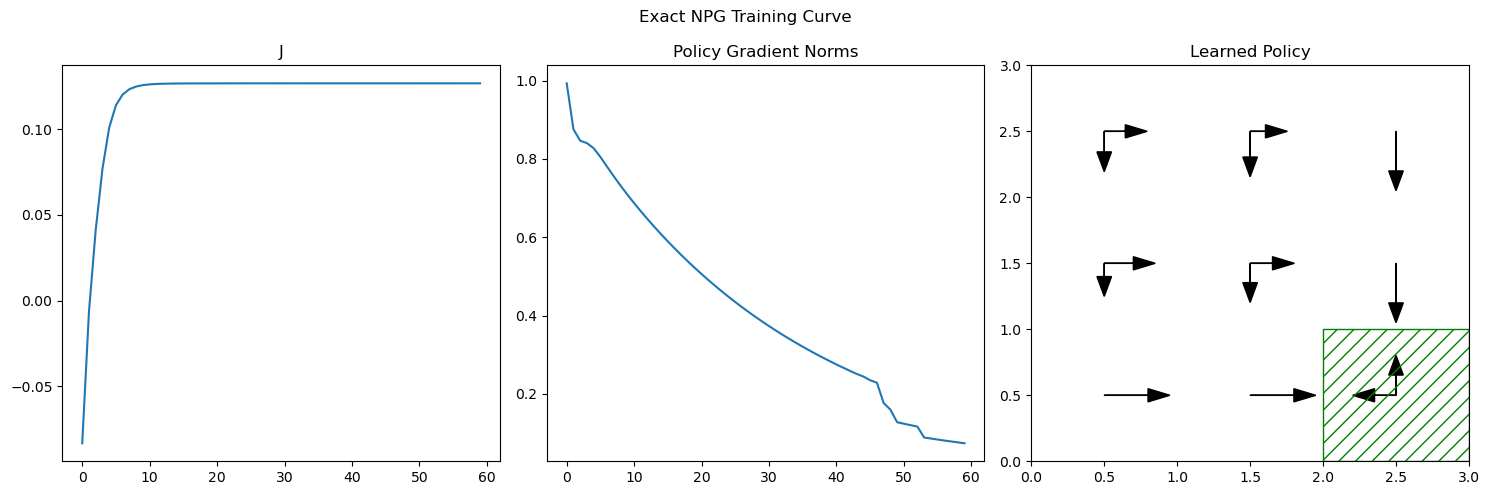

In [11]:
plotPgTrace(    data_path="../logs/example_exact_npg.pkl",
                title="Exact NPG Training Curve")

### Training with Monte-Carlo gradient estimators

In [7]:
from env.sample import Sampler
from algs.pg import stochNaturalPG


mdp = ExampleMDPs.gworld1()
smp = Sampler(mdp,batchsize=300,horizon=150)
trainer = PG_Trainer(mdp,policy_lr=0.08,beta=0.1,sampler=smp,gradients=stochNaturalPG,max_theta=1e3,key=jax.random.PRNGKey(1312))
trainData = trainer.train(100)
pickle.dump(trainData, open( "../logs/example_stoch_npg.pkl", "wb" ) )

100%|██████████| 100/100 [02:01<00:00,  1.21s/it]


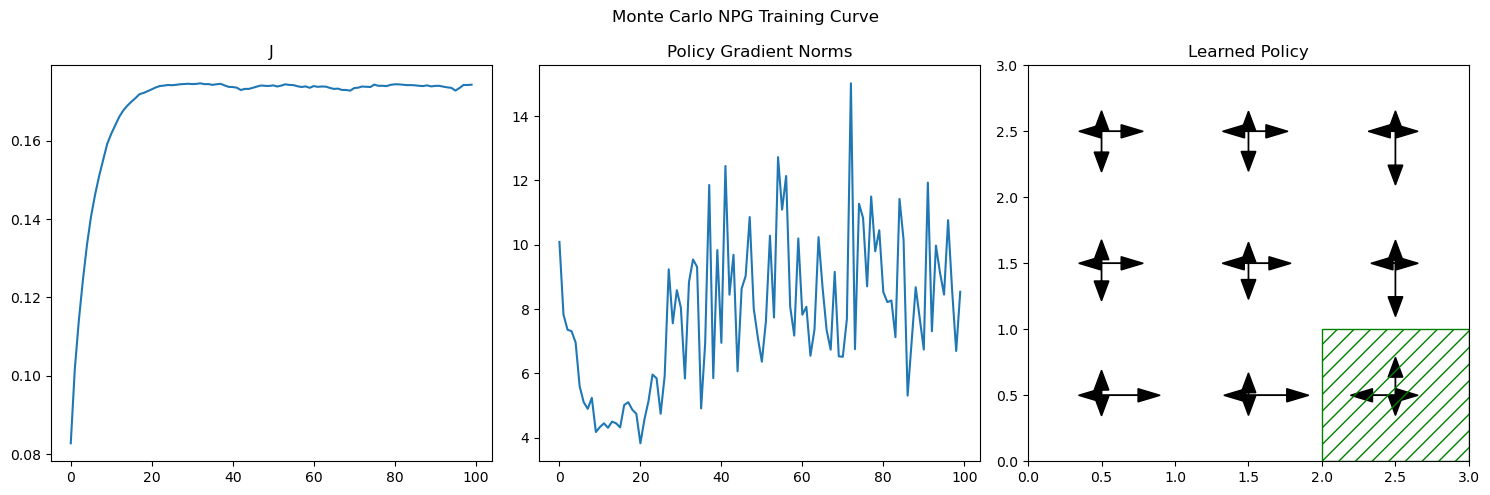

In [13]:
plotPgTrace(    data_path="../logs/example_stoch_npg.pkl",
                title="Monte Carlo NPG Training Curve")